# Segmentation Objects in Image with MxNet and GluonCV

In [1]:
# Imports
import mxnet as mx 
import gluoncv as gcv 
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
# Package versions
%reload_ext watermark
%watermark -a "Datasnow" --iversions

autopep8   1.4.4
matplotlib 3.1.3
gluoncv    0.8.0
numpy      1.18.1
json       2.0.9
mxnet      1.7.0
Datasnow


In [4]:
# Load image
image = mx.image.imread('imagens/family.jpg')
copy_image = image.asnumpy().copy()

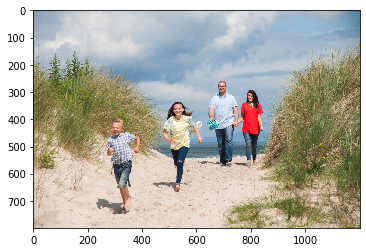

In [5]:
# Plotting image
plt.imshow(image.asnumpy())

In [6]:
# Transforming image to aplly to model FCN (Fully Convolutional Network)
from mxnet.gluon.data.vision import transforms

transforms_fn = transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize([.485,.456,.406], [.229,.224,.225])])

In [7]:
# Applying transformation in image
image = transforms_fn(image)

In [8]:
# Shape
image.shape

(3, 799, 1200)

In [9]:
# Expande as Dimensoes
image = image.expand_dims(0)
image.shape

(1, 3, 799, 1200)

In [10]:
# Download pre-trained model
network = gcv.model_zoo.get_model('fcn_resnet50_ade', pretrained = True)

57418KB [00:03, 14359.68KB/s]                           


128832KB [00:09, 13333.29KB/s]                            


In [11]:
# Predicted with model
output = network.predict(image)

In [12]:
output.shape

(1, 150, 799, 1200)

In [13]:
# Extracting first dim
output = output[0]
output


[[[ 4.081644    4.181166    4.2806883  ...  2.7929647   2.7708066
    2.748651  ]
  [ 4.2068095   4.30369     4.40057    ...  2.7078018   2.6840787
    2.6603582 ]
  [ 4.331975    4.4262133   4.5204515  ...  2.6226392   2.5973508
    2.5720656 ]
  ...
  [ 3.7788577   3.7833834   3.7879086  ...  4.200611    4.1435738
    4.0865436 ]
  [ 3.7831461   3.784739    3.786332   ...  4.1997766   4.1523204
    4.10487   ]
  [ 3.787434    3.7860947   3.7847552  ...  4.1989417   4.161066
    4.123195  ]]

 [[ 1.5074298   1.5262567   1.5450833  ...  3.0371099   3.0039303
    2.9707549 ]
  [ 1.657452    1.6822089   1.7069657  ...  2.8024929   2.776397
    2.7503045 ]
  [ 1.8074741   1.8381612   1.8688481  ...  2.5678759   2.5488636
    2.5298536 ]
  ...
  [ 2.1012676   2.036524    1.9717802  ...  0.9596106   1.0638934
    1.1681635 ]
  [ 2.100817    2.028722    1.9566271  ...  0.9968504   1.1034353
    1.2100073 ]
  [ 2.1003664   2.0209208   1.9414749  ...  1.0340879   1.1429747
    1.2518483 ]]

 

In [15]:
# To extract probability apllying softmax function
output_prob = mx.nd.softmax(output, axis=0)
output_prob


[[[5.49524371e-03 4.94954875e-03 4.45473474e-03 ... 7.60432886e-05
   9.13829936e-05 1.09807646e-04]
  [4.77891089e-03 4.28653788e-03 3.84268863e-03 ... 5.89695919e-05
   7.09302403e-05 8.53099991e-05]
  [4.15065559e-03 3.70842894e-03 3.31183872e-03 ... 4.57273163e-05
   5.50519908e-05 6.62733146e-05]
  ...
  [8.32981765e-02 7.96007812e-02 7.57226050e-02 ... 6.60105199e-02
   6.82319477e-02 7.02961534e-02]
  [8.82374793e-02 8.43666494e-02 8.03182125e-02 ... 7.52225220e-02
   7.78916031e-02 8.03808495e-02]
  [9.28945541e-02 8.88979807e-02 8.47254470e-02 ... 8.50172266e-02
   8.81747380e-02 9.11299065e-02]]

 [[4.18812881e-04 3.47978988e-04 2.88910669e-04 ... 9.70715409e-05
   1.15374489e-04 1.37116949e-04]
  [3.73385177e-04 3.11610405e-04 2.59906781e-04 ... 6.48264104e-05
   7.77901223e-05 9.33389529e-05]
  [3.32460389e-04 2.78749008e-04 2.33610481e-04 ... 4.32904526e-05
   5.24463285e-05 6.35340402e-05]
  ...
  [1.55620705e-02 1.38760544e-02 1.23166069e-02 ... 2.58264341e-03
   3.1368

In [16]:
# Use argmax to get the maximum probability
prediction = mx.nd.argmax(output, 0).asnumpy()
prediction

array([[ 2.,  2.,  2., ...,  2.,  2.,  2.],
       [ 2.,  2.,  2., ...,  2.,  2.,  2.],
       [ 2.,  2.,  2., ...,  2.,  2.,  2.],
       ...,
       [ 3.,  3.,  3., ..., 13., 13., 13.],
       [ 3.,  3.,  3., ..., 13., 13., 13.],
       [ 3.,  3.,  3., ..., 13., 13., 13.]], dtype=float32)

In [24]:
# Precisamos de uma paleta de cores para a imagem segmentada
from gluoncv.utils.viz import get_color_pallete
prediction_image = get_color_pallete(prediction, 'ade20k')

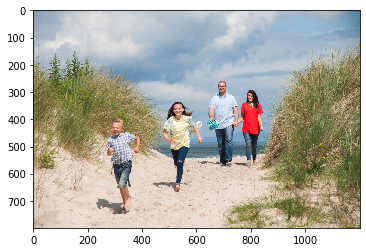

In [25]:
plt.imshow(copy_image)

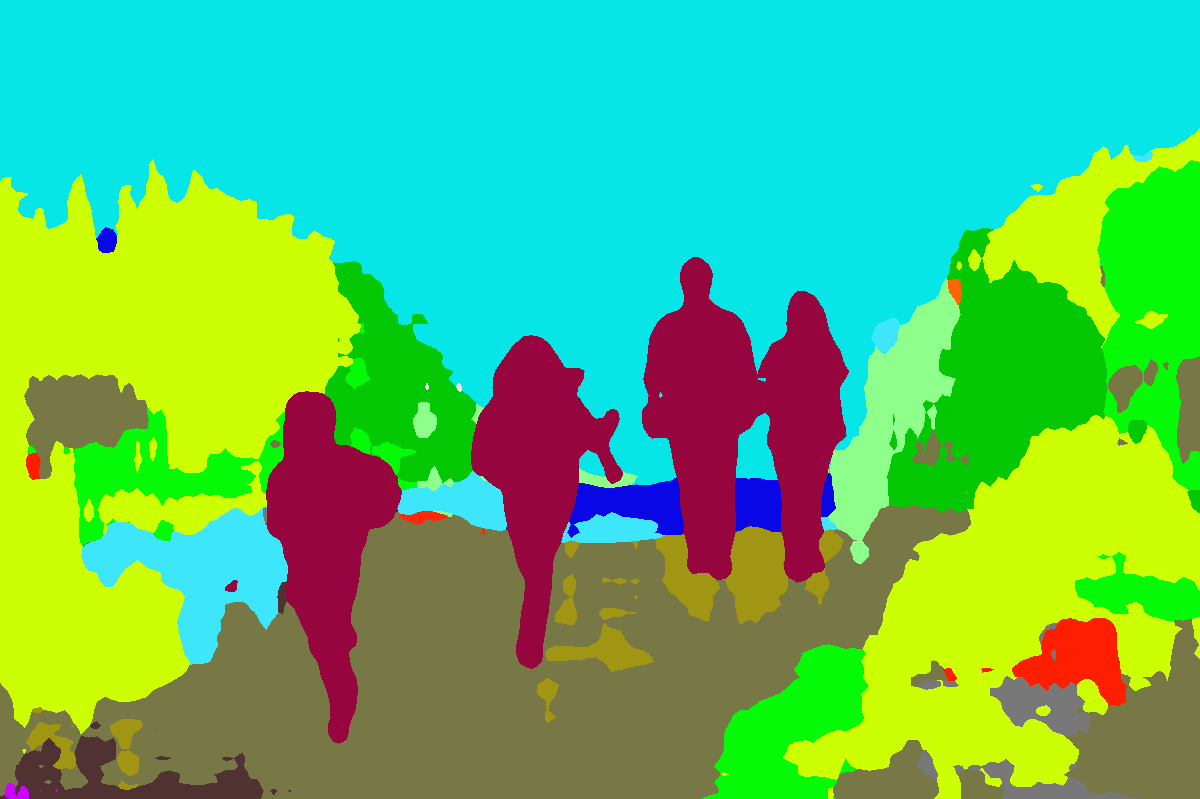

In [26]:
prediction_image